Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
#import numpy as np
import pandas as pd
from scipy.stats import norm
#from math import factorial
#import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore')

# Pandas

## Introduction

<p>*pandas* is a python library that is a monster at data manipulation.  Dare I say: **I love *pandas*!**</p>

## Some basic *pandas*

In [3]:
values_1 = [12.3, 14.2, 15.2, 13.2, 15.4, 11, 12.8, 18.3, 14.3, 15.9, 9.9, 11.9, 17.9]
# Some values in an array

In [4]:
data_1 = pd.Series(values_1) # Taking the values in values_1 and adding them to the computer
# variable data_1

In [5]:
data_1 # Each value is now part of an ordered list, each attached to an index value (starting
# at 0)

0     12.3
1     14.2
2     15.2
3     13.2
4     15.4
5     11.0
6     12.8
7     18.3
8     14.3
9     15.9
10     9.9
11    11.9
12    17.9
dtype: float64

In [6]:
type(values_1) # Whereas values_1 is a computer variable that is a list...

list

In [7]:
type(data_1) # ... is a pandas Series object

pandas.core.series.Series

In [8]:
data_1.describe() # The simplest way to describe a column of values

count    13.000000
mean     14.023077
std       2.516994
min       9.900000
25%      12.300000
50%      14.200000
75%      15.400000
max      18.300000
dtype: float64

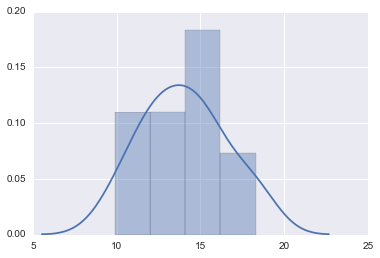

In [9]:
sns.distplot(data_1) # A quick histogram and kernel density estimate of the values

In [10]:
values_2 = pd.Series(norm.rvs(loc = 18, scale = 4, size = 13)) # Creating another series, this
# time containing 13 random values from a normal distribution with a mean of 18 and a
# standrad deviation of 4
# I imported the norm function from the scipy.stats library

In [11]:
data_2 = pd.DataFrame() # A new (empty)  pandas DataFrame

In [12]:
data_2['var_1'] = values_1 # Making a new column, calling it var_1 and adding the values in
# values_1 to it

In [13]:
data_2

,var_1
0,12.3
1,14.2
2,15.2
3,13.2
4,15.4
5,11.0
6,12.8
7,18.3
8,14.3
9,15.9


In [14]:
data_2['var_2'] = values_2 # Adding another column to the DataFrame and adding the values in
# values_2 to it

In [15]:
data_2

,var_1,var_2
0,12.3,21.515040
1,14.2,20.012435
2,15.2,23.513542
3,13.2,14.871926
4,15.4,20.694091
5,11.0,21.867815
6,12.8,16.358531
7,18.3,15.531141
8,14.3,21.665154
9,15.9,18.233597


In [16]:
data_2.describe()

,var_1,var_2
count,13.000000,13.000000
mean,14.023077,18.707692
std,2.516994,3.562157
min,9.900000,10.677342
25%,12.300000,16.358531
50%,14.200000,20.001324
75%,15.400000,21.515040
max,18.300000,23.513542


In [17]:
data_3 = data_2[data_2['var_1'] > 15] # Creating a new DataFrame only including rows (for all
# columns) where the values in the var_1 column is greater than 15
data_3

,var_1,var_2
2,15.2,23.513542
4,15.4,20.694091
7,18.3,15.531141
9,15.9,18.233597
12,17.9,18.258056


In [18]:
data_2['groups'] = ['A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A']
# The data_2 DataFrame now has a new column called groups

In [19]:
data_2

,var_1,var_2,groups
0,12.3,21.515040,A
1,14.2,20.012435,A
2,15.2,23.513542,B
3,13.2,14.871926,A
4,15.4,20.694091,B
5,11.0,21.867815,A
6,12.8,16.358531,B
7,18.3,15.531141,B
8,14.3,21.665154,B
9,15.9,18.233597,A


In [20]:
data_4 = data_2.groupby('groups')
# Creating a new DataFrame by splitting up DataFrame data_2

In [21]:
data_4.describe() # Now this is magic!

var_1      var_2
groups                            
A      count   7.000000   7.000000
       mean   13.485714  19.251456
       std     2.779346   2.391433
       min     9.900000  14.871926
       25%    11.650000  18.245827
       50%    13.200000  20.001324
       75%    15.050000  20.763737
       max    17.900000  21.867815
B      count   6.000000   6.000000
       mean   14.650000  18.073300
       std     2.249222   4.763809
       min    11.900000  10.677342
       25%    13.175000  15.737989
       50%    14.750000  18.526311
       75%    15.350000  21.422388
       max    18.300000  23.513542

## Importing spreadsheet files

In [22]:
data_5 = pd.read_csv('MOOC_Mock.csv') # Creating a computer variable called data_5, attatching
# to it a comma seperated value file, which makes it a DataFrame

In [23]:
type(data_5) # Yes, it's a DataFrame object

pandas.core.frame.DataFrame

In [24]:
data_5.head() # Showing the first few (default is 5) rows

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3
3,4,20,Female,2,9,No,Yes,NaN,120,35.7,77.8,4.45,8.8,No,No,No,0
4,5,28,Female,3,3,No,Yes,491,115,37.1,51.6,21.98,13.4,No,Yes,No,7


In [25]:
data_5.set_index('File').head(3) # Changing the default index column to the File column

,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
File,,,,,,,,,,,,,,,,
1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
2,32,Male,6,10,No,Yes,57,109,38.8,45.3,7.08,19.8,No,No,Yes,8
3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


In [26]:
data_5.tail(3)

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
147,148,54,Male,5,11,Yes,Yes,NaN,115,38.2,NaN,17.64,15.7,Yes,Yes,No,1
148,149,29,Male,4,6,No,Yes,45,133,41.2,163.5,15.50,19.2,Yes,Yes,Yes,9
149,150,55,Female,5,2,Yes,Yes,78,95,40.6,NaN,24.22,16.5,Yes,Yes,No,4
